In [2]:
import pandas as pd
import seaborn as sns

sns.set()
sns.__version__

'0.11.2'

In [3]:
#!pip3 install seaborn==0.11.2

In [4]:
df = pd.read_csv('data/questions/parl_questions.csv',index_col=0,
                 parse_dates=["dob",'date tabled'],
                date_parser= lambda x: pd.to_datetime(x, format="%Y-%m-%"))

In [5]:
df.head()

,uri,answer date,answer date time,answering body,commons question time > question type,location > pref label,question status,ballot number,date tabled,modified,...,tabling member > uri,tabling member > constituency > pref label,tabling member printed,uin,tabling member,gender,party,uri_mp,dob,uri_dob
0,http://data.parliament.uk/resources/1388433,2022-01-05,2022-01-05T00:00:00,Prime Minister,Substantive,House of Commons chamber,Tabled,5,2021-12-16,2021-12-16T14:51:06.915,...,http://data.parliament.uk/members/1601,Bromley and Chislehurst,Sir Robert Neill,904884.0,NaN,Male,Conservative,http://data.parliament.uk/members/1601,1952-06-24,http://data.parliament.uk/members/1601
1,http://data.parliament.uk/resources/1386494,2021-12-15,2021-12-15T00:00:00,Prime Minister,Substantive,House of Commons chamber,Tabled,9,2021-12-09,2021-12-15T09:09:06.008,...,http://data.parliament.uk/members/1601,Bromley and Chislehurst,Sir Robert Neill,904812.0,NaN,Male,Conservative,http://data.parliament.uk/members/1601,1952-06-24,http://data.parliament.uk/members/1601
2,http://data.parliament.uk/resources/1379254,2021-11-23,2021-11-23T00:00:00,Department of Health and Social Care,Topical,House of Commons chamber,Tabled,10,2021-11-17,2021-11-23T13:44:07.090,...,http://data.parliament.uk/members/1601,Bromley and Chislehurst,Sir Robert Neill,904329.0,NaN,Male,Conservative,http://data.parliament.uk/members/1601,1952-06-24,http://data.parliament.uk/members/1601
3,http://data.parliament.uk/resources/1351922,2021-09-06,2021-09-06T00:00:00,Department for Education,Substantive,House of Commons chamber,Tabled,9,2021-08-31,2021-09-06T15:32:44.687,...,http://data.parliament.uk/members/1601,Bromley and Chislehurst,Sir Robert Neill,903323.0,NaN,Male,Conservative,http://data.parliament.uk/members/1601,1952-06-24,http://data.parliament.uk/members/1601
4,http://data.parliament.uk/resources/1347152,2021-07-22,2021-07-22T00:00:00,"Department for Environment, Food and Rural Aff...",Substantive,House of Commons chamber,Tabled,13,2021-07-15,2021-08-18T17:06:49.789,...,http://data.parliament.uk/members/1601,Bromley and Chislehurst,Sir Robert Neill,903142.0,NaN,Male,Conservative,http://data.parliament.uk/members/1601,1952-06-24,http://data.parliament.uk/members/1601


In [6]:
df.shape

(36748, 22)

In [58]:
df['uri_mp'].unique().shape

(740,)

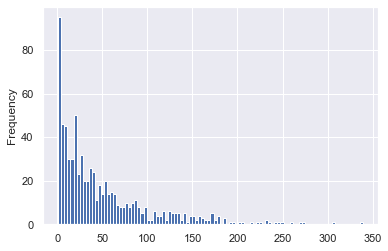

In [59]:
df.groupby('uri_mp')['uri'].count().plot(kind='hist',bins=100)

In [63]:
df.groupby(['uri_mp','answering body'])['uri'].count().groupby(level=0).apply(lambda x: x / x.sum())

uri_mp                                 answering body                              
http://data.parliament.uk/members/103  Department of Health and Social Care            0.500000
                                       Prime Minister                                  0.500000
http://data.parliament.uk/members/104  Department of Health and Social Care            0.071429
                                       Foreign and Commonwealth Office                 0.071429
                                       Foreign, Commonwealth and Development Office    0.071429
                                                                                         ...   
http://data.parliament.uk/members/93   HM Treasury                                     0.050000
                                       Home Office                                     0.025000
                                       Ministry of Defence                             0.050000
                                       Ministry of J

In [ ]:
len()

In [67]:
df.groupby(['uri_mp','gender'])['answering body'].apply(lambda x: len(set(x)))

uri_mp                                 gender
http://data.parliament.uk/members/103  Male       2
http://data.parliament.uk/members/104  Male       7
http://data.parliament.uk/members/111  Male       4
http://data.parliament.uk/members/114  Male      33
http://data.parliament.uk/members/116  Male      16
                                                 ..
http://data.parliament.uk/members/69   Male      19
http://data.parliament.uk/members/76   Male      10
http://data.parliament.uk/members/77   Male       2
http://data.parliament.uk/members/87   Male      12
http://data.parliament.uk/members/93   Male      15
Name: answering body, Length: 740, dtype: int64

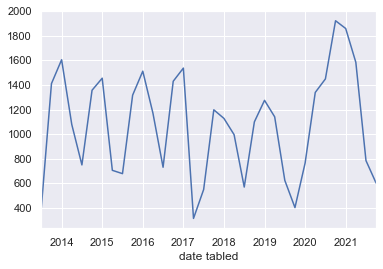

In [54]:
df.set_index('date tabled').resample('Q')['uri'].count().plot()

In [28]:
get_age = lambda x: 2021 - x.year
df['age'] = df['dob'].apply(get_age)

In [29]:
members = df[['age','party','gender']].drop_duplicates()

gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

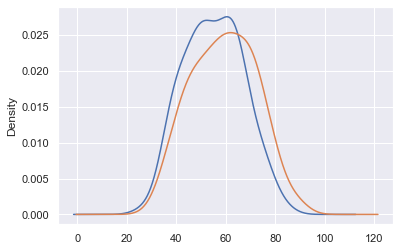

In [30]:
members.groupby('gender')['age'].plot(kind='density')

In [32]:
members[['age','gender']]

,age,gender
0,69,Male
87,52,Male
290,63,Male
335,43,Male
404,59,Male
...,...,...
36719,70,Male
36728,75,Male
36735,51,Male
36740,58,Female


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


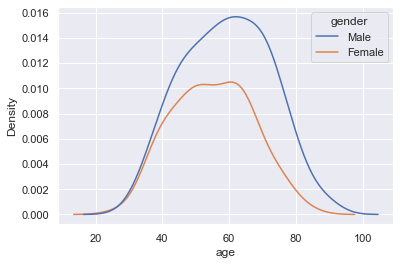

In [33]:
sns.kdeplot(x='age',hue='gender',data=members[['age','gender']])

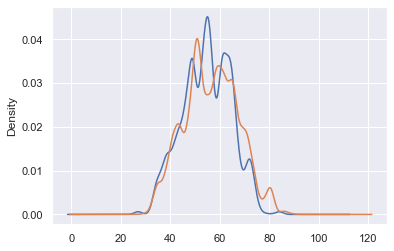

In [36]:
df[df.gender=='Female']['age'].plot(kind='density')
df[df.gender=='Male']['age'].plot(kind='density')

In [37]:
df.groupby(['answering body','gender'])

In [38]:
%matplotlib inline
by_gender = df.groupby(['answering body','gender'])['date tabled'].count()#.reset_index()
by_gender

answering body        gender
Attorney General      Female    224
                      Male      455
COP26                 Female     51
                      Male      112
Cabinet Office        Female    390
                               ... 
Treasury              Male      557
Wales Office          Female    184
                      Male      660
Women and Equalities  Female    440
                      Male      552
Name: date tabled, Length: 83, dtype: int64

In [39]:
probs = by_gender.groupby(level=1).apply(lambda x: x / float(x.sum()))
probs_df = probs.reset_index()

In [40]:
probs_df

,answering body,gender,date tabled
0,Attorney General,Female,0.019846
1,Attorney General,Male,0.017870
2,COP26,Female,0.004518
3,COP26,Male,0.004399
4,Cabinet Office,Female,0.034553
...,...,...,...
78,Treasury,Male,0.021877
79,Wales Office,Female,0.016302
80,Wales Office,Male,0.025922
81,Women and Equalities,Female,0.038983


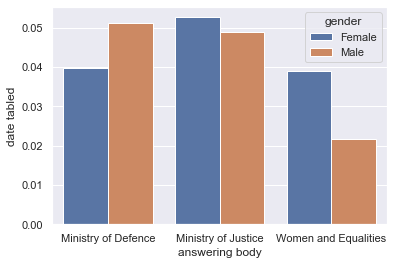

In [41]:
domains = ['Women and Equalities','Ministry of Defence','Ministry of Justice']
sns.barplot(x="answering body", y="date tabled", hue='gender', data=probs_df[probs_df['answering body'].isin(domains)])

In [24]:
by_gender.plot('')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='')` instead of `Series.plot('',)`.

In [26]:
df.groupby('gender')['age'].mad()

gender
Female    6.856617
Male      7.906342
Name: age, dtype: float64

In [1]:
df

NameError: name 'df' is not defined

In [37]:
by_mp = df.groupby(['uri_mp','answering body'])['uri'].count()
by_mp[:,'Ministry of Justice']

uri_mp
http://data.parliament.uk/members/114     7
http://data.parliament.uk/members/1170    1
http://data.parliament.uk/members/1198    8
http://data.parliament.uk/members/12      4
http://data.parliament.uk/members/1387    4
                                         ..
http://data.parliament.uk/members/602     4
http://data.parliament.uk/members/605     1
http://data.parliament.uk/members/69      1
http://data.parliament.uk/members/87      1
http://data.parliament.uk/members/93      2
Name: uri, Length: 437, dtype: int64

In [38]:
by_mp[:,'Ministry of Justice']

uri_mp
http://data.parliament.uk/members/114     7
http://data.parliament.uk/members/1170    1
http://data.parliament.uk/members/1198    8
http://data.parliament.uk/members/12      4
http://data.parliament.uk/members/1387    4
                                         ..
http://data.parliament.uk/members/602     4
http://data.parliament.uk/members/605     1
http://data.parliament.uk/members/69      1
http://data.parliament.uk/members/87      1
http://data.parliament.uk/members/93      2
Name: uri, Length: 437, dtype: int64

In [39]:
by_mp.groupby(['uri_mp']).sum()

uri_mp
http://data.parliament.uk/members/103      2
http://data.parliament.uk/members/104     14
http://data.parliament.uk/members/111      5
http://data.parliament.uk/members/114    118
http://data.parliament.uk/members/116     34
                                        ... 
http://data.parliament.uk/members/69      35
http://data.parliament.uk/members/76      23
http://data.parliament.uk/members/77       3
http://data.parliament.uk/members/87      21
http://data.parliament.uk/members/93      40
Name: uri, Length: 740, dtype: int64

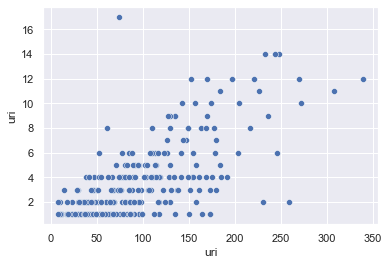

In [40]:
sns.scatterplot(x=by_mp.groupby(level=0).sum(),y=by_mp[:,'Women and Equalities'])

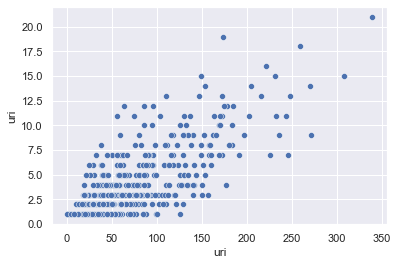

In [41]:
sns.scatterplot(x=by_mp.groupby(level=0).sum(),y=by_mp[:,'Ministry of Justice'])

In [56]:
by_mp = df.groupby(['uri_mp','answering body','gender'])['uri'].count()
#by_mp['t_count'] = df.groupby(['uri_mp','','gender'])['uri'].count()

In [61]:
by_mp_row = by_mp.unstack(level=1)

In [63]:
by_mp_row.fillna(0,inplace=True)


,answering body,Attorney General,COP26,Cabinet Office,Chancellor of the Duchy of Lancaster,Chancellor of the Duchy of Lancaster and Minister for the Cabinet Office,Church Commissioners,"Department for Business, Energy and Industrial Strategy","Department for Business, Innovation and Skills",Department for Communities and Local Government,"Department for Culture, Media and Sport",...,Ministry of Justice,Northern Ireland Office,Parliamentary Works Sponsor Body,Prime Minister,Public Accounts Commission,Scotland Office,Speaker's Committee on the Electoral Commission,Treasury,Wales Office,Women and Equalities
uri_mp,gender,,,,,,,,,,,,,,,,,,,,,
http://data.parliament.uk/members/103,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
http://data.parliament.uk/members/104,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0
http://data.parliament.uk/members/111,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://data.parliament.uk/members/114,Male,7.0,1.0,4.0,0.0,0.0,5.0,4.0,1.0,2.0,1.0,...,7.0,2.0,0.0,13.0,0.0,2.0,0.0,4.0,2.0,1.0
http://data.parliament.uk/members/116,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://data.parliament.uk/members/69,Male,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
http://data.parliament.uk/members/76,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0
http://data.parliament.uk/members/77,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
by_mp_row['all'] = by_mp_row.sum(axis=1)

In [75]:
by_mp_row = by_mp_row.reset_index()

In [76]:
by_mp_row['gender']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
735    Male
736    Male
737    Male
738    Male
739    Male
Name: gender, Length: 740, dtype: object

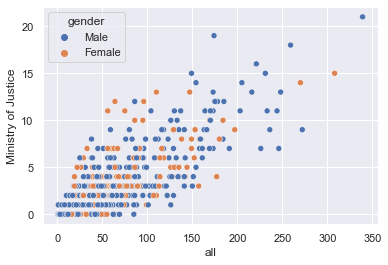

In [77]:
sns.scatterplot(x='all',y='Ministry of Justice',hue='gender',data=by_mp_row)

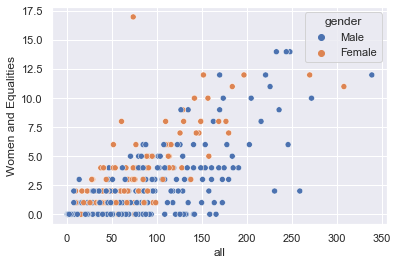

In [78]:
sns.scatterplot(x='all',y='Women and Equalities',hue='gender',data=by_mp_row)

In [90]:
import numpy as np


array([[  2.],
       [ 14.],
       [  5.],
       [118.],
       [ 34.],
       [  2.],
       [ 11.],
       [  4.],
       [  4.],
       [  2.],
       [ 76.],
       [ 52.],
       [  8.],
       [  8.],
       [  3.],
       [  2.],
       [ 16.],
       [ 10.],
       [  1.],
       [ 17.],
       [ 22.],
       [ 15.],
       [ 77.],
       [  1.],
       [  1.],
       [ 64.],
       [  7.],
       [ 22.],
       [ 10.],
       [ 53.],
       [ 32.],
       [  4.],
       [  1.],
       [102.],
       [ 20.],
       [ 24.],
       [ 23.],
       [ 28.],
       [  1.],
       [  5.],
       [ 48.],
       [  1.],
       [  9.],
       [  1.],
       [ 61.],
       [ 25.],
       [ 34.],
       [  7.],
       [ 14.],
       [ 10.],
       [ 21.],
       [161.],
       [180.],
       [  7.],
       [ 78.],
       [173.],
       [ 11.],
       [  9.],
       [ 94.],
       [ 56.],
       [ 20.],
       [  5.],
       [  4.],
       [  4.],
       [  9.],
       [ 37.],
       [ 1

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(by_mp_row['all'])[...,np.newaxis], np.array(by_mp_row['Women and Equalities'])[...,np.newaxis])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
pd.DataFrame(by_mp_row['Women and Equalities']).assign(const=1)

,Women and Equalities,const
0,0.0,1
1,3.0,1
2,0.0,1
3,1.0,1
4,0.0,1
...,...,...
735,0.0,1
736,0.0,1
737,0.0,1
738,0.0,1


In [101]:
import statsmodels.api as sm

model = sm.OLS(np.array(by_mp_row['Women and Equalities']), pd.DataFrame(by_mp_row['all']).assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1004.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          8.70e-140
Time:                        11:26:20   Log-Likelihood:                -1411.6
No. Observations:                 740   AIC:                             2827.
Df Residuals:                     738   BIC:                             2836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
all            0.0356      0.001     31.688      0.000       0.033       0.038
const         -0.4295      0.082     -5.239      0.000      -0.590      -0.269
==============================================================================
Omnibus:                      293.549   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4534.645
Skew:                           1.356   Prob(JB):                         0.00
Kurtosis:                      14.820   Cond. No.                         99.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model.coef_

array([[0.03564446]])

In [93]:
model.intercept_

array([-0.42954414])

In [106]:
by_mp_row[:10]

answering body,uri_mp,gender,Attorney General,COP26,Cabinet Office,Chancellor of the Duchy of Lancaster,Chancellor of the Duchy of Lancaster and Minister for the Cabinet Office,Church Commissioners,"Department for Business, Energy and Industrial Strategy","Department for Business, Innovation and Skills",...,Northern Ireland Office,Parliamentary Works Sponsor Body,Prime Minister,Public Accounts Commission,Scotland Office,Speaker's Committee on the Electoral Commission,Treasury,Wales Office,Women and Equalities,all
0,http://data.parliament.uk/members/103,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,http://data.parliament.uk/members/104,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0
2,http://data.parliament.uk/members/111,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,http://data.parliament.uk/members/114,Male,7.0,1.0,4.0,0.0,0.0,5.0,4.0,1.0,...,2.0,0.0,13.0,0.0,2.0,0.0,4.0,2.0,1.0,118.0
4,http://data.parliament.uk/members/116,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
5,http://data.parliament.uk/members/1166,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
6,http://data.parliament.uk/members/117,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
7,http://data.parliament.uk/members/1170,Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,http://data.parliament.uk/members/1171,Male,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
9,http://data.parliament.uk/members/1191,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [121]:
by_mp_row.corr()['all']

answering body
Attorney General                                                            0.768516
COP26                                                                       0.495064
Cabinet Office                                                              0.827445
Chancellor of the Duchy of Lancaster                                        0.080351
Chancellor of the Duchy of Lancaster and Minister for the Cabinet Office    0.361069
Church Commissioners                                                        0.483297
Department for Business, Energy and Industrial Strategy                     0.778503
Department for Business, Innovation and Skills                              0.511141
Department for Communities and Local Government                             0.564158
Department for Culture, Media and Sport                                     0.594660
Department for Digital, Culture, Media and Sport                            0.779572
Department for Education                          

In [108]:
X = pd.get_dummies(by_mp_row[['gender','Women and Equalities','all']],drop_first=True)
X

,Women and Equalities,all,gender_Male
0,0.0,2.0,1
1,3.0,14.0,1
2,0.0,5.0,1
3,1.0,118.0,1
4,0.0,34.0,1
...,...,...,...
735,0.0,35.0,1
736,0.0,23.0,1
737,0.0,3.0,1
738,0.0,21.0,1


In [110]:
model = sm.OLS(np.array(X['Women and Equalities']), pd.DataFrame(X[['all','gender_Male']]).assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     553.6
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.61e-147
Time:                        11:31:32   Log-Likelihood:                -1390.1
No. Observations:                 740   AIC:                             2786.
Df Residuals:                     737   BIC:                             2800.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
all             0.0354      0.001     32.380      0.000       0.033       0.038
gender_Male    -0.8538      0.128     -6.652      0.000      -1.106      -0.602
const           0.1863      0.122      1.525      0.128      -0.053       0.426
==============================================================================
Omnibus:                      288.294   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4105.441
Skew:                           1.348   Prob(JB):                         0.00
Kurtosis:                      14.220   Cond. No.                         208.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
X = pd.get_dummies(by_mp_row[['gender','COP26','all']],drop_first=True)
model = sm.OLS(np.array(X['COP26']), pd.DataFrame(X[['all','gender_Male']]).assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.01e-45
Time:                        11:32:55   Log-Likelihood:                -605.83
No. Observations:                 740   AIC:                             1218.
Df Residuals:                     737   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
all             0.0059      0.000     15.460      0.000       0.005       0.007
gender_Male    -0.0009      0.044     -0.020      0.984      -0.088       0.086
const          -0.0701      0.042     -1.656      0.098      -0.153       0.013
==============================================================================
Omnibus:                      525.377   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8575.405
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      18.537   Cond. No.                         208.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.groupby('uri_mp')['uri'].count()

uri_mp
http://data.parliament.uk/members/103      2
http://data.parliament.uk/members/104     14
http://data.parliament.uk/members/111      5
http://data.parliament.uk/members/114    118
http://data.parliament.uk/members/116     34
                                        ... 
http://data.parliament.uk/members/69      35
http://data.parliament.uk/members/76      23
http://data.parliament.uk/members/77       3
http://data.parliament.uk/members/87      21
http://data.parliament.uk/members/93      40
Name: uri, Length: 740, dtype: int64

In [116]:
from statsmodels.discrete.discrete_model import NegativeBinomial

In [118]:
X = pd.get_dummies(by_mp_row[['gender','Women and Equalities','all']],drop_first=True)
model = NegativeBinomial(np.array(X['Women and Equalities']), pd.DataFrame(X[['all','gender_Male']]).assign(const=1))
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 1.187442
         Iterations: 17
         Function evaluations: 20
         Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                  740
Model:               NegativeBinomial   Df Residuals:                      737
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:                  0.2028
Time:                        11:36:50   Log-Likelihood:                -878.71
converged:                       True   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                 8.382e-98
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
all             0.0199      0.001     19.782      0.000       0.018       0.022
gender_Male    -0.8209      0.105     -7.786      0.000      -1.028      -0.614
const          -0.8186      0.108     -7.607      0.000      -1.030      -0.608
alpha           0.6153      0.093      6.582      0.000       0.432       0.799
===============================================================================
"""

In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = pd.get_dummies(by_mp_row[['gender','Women and Equalities','all']],drop_first=True)
X.columns = ['response','all','gender']
X

,response,all,gender
0,0.0,2.0,1
1,3.0,14.0,1
2,0.0,5.0,1
3,1.0,118.0,1
4,0.0,34.0,1
...,...,...,...
735,0.0,35.0,1
736,0.0,23.0,1
737,0.0,3.0,1
738,0.0,21.0,1


In [137]:
model = smf.glm(formula='response ~ gender + all', data=X, family=sm.families.NegativeBinomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                  740
Model:                            GLM   Df Residuals:                      737
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -884.37
Date:                Mon, 27 Dec 2021   Deviance:                       522.56
Time:                        12:00:25   Pearson chi2:                     595.
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9093      0.113     -8.039      0.000      -1.131      -0.688
gender        -0.8269      0.121     -6.834      0.000      -1.064      -0.590
all            0.0211      0.001     23.369      0.000       0.019       0.023
==============================================================================
"""

In [145]:
-np.exp(0.8269) * 100

-228.62204601880202

In [141]:
np.exp(0.0211)

1.0213241789489729

In [119]:
np.exp(-0.8209)

0.4400354443382635